In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from src.data_utils import load_alteration_distances

In [2]:
distances = load_alteration_distances()
distances.head()

,id,pos,alteration,frechet,procrustes_frechet,frechet_norm,procrustes_frechet_norm,relative_angle_distance,normalized_relative_angle_distance,representation,value,type,pos_percentage,bucket_5,bucket_10,representationTex
30,0,2,"[1.1, 1.0]",0.243329,0.227296,0.001395,0.001303,0.522171,0.002995,bezier,10,first,0.074074,"(-0.001, 0.185]","(-0.001, 0.0741]",$Cartesian_{\mathit{Bez}}$
31,0,2,"[1.0, 1.1]",0.577964,0.626994,0.003304,0.003585,1.596102,0.009155,bezier,10,second,0.074074,"(-0.001, 0.185]","(-0.001, 0.0741]",$Cartesian_{\mathit{Bez}}$
33,0,2,"[1.2, 1.0]",0.486788,0.454878,0.002788,0.002605,1.030766,0.005912,bezier,20,first,0.074074,"(-0.001, 0.185]","(-0.001, 0.0741]",$Cartesian_{\mathit{Bez}}$
34,0,2,"[1.0, 1.2]",1.147757,1.253470,0.006540,0.007143,3.195422,0.018328,bezier,20,second,0.074074,"(-0.001, 0.185]","(-0.001, 0.0741]",$Cartesian_{\mathit{Bez}}$
36,0,2,"[1.3, 1.0]",0.646059,0.619693,0.003698,0.003547,1.537909,0.008821,bezier,30,first,0.074074,"(-0.001, 0.185]","(-0.001, 0.0741]",$Cartesian_{\mathit{Bez}}$


In [4]:
from src.plots import plot_positions

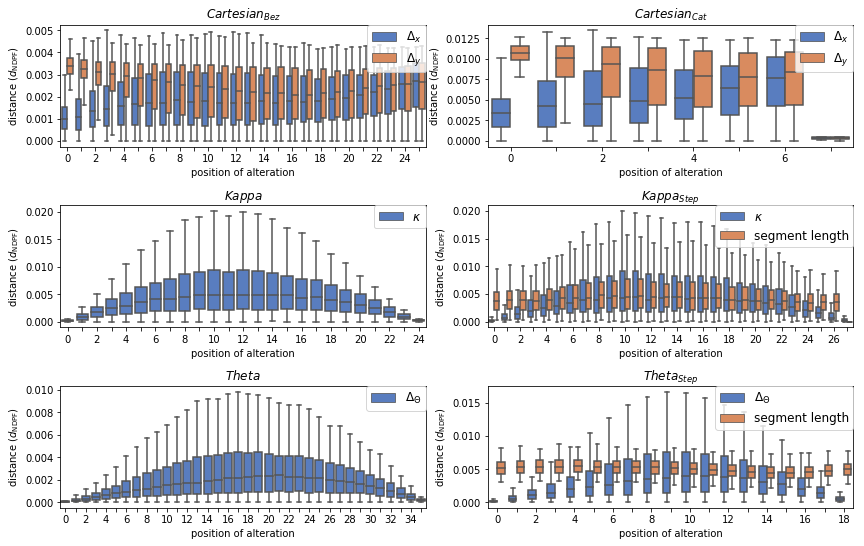

In [5]:
fig = plot_positions(distances)
fig.savefig('./figures/positions.pdf')

In [8]:
from src.plots import plot_alterations_by_value

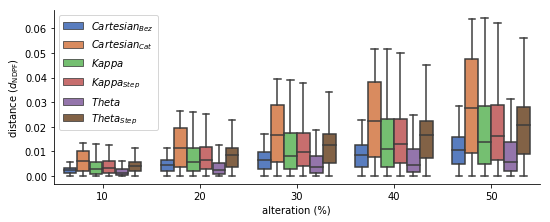

In [9]:
fig = plot_alterations_by_value(distances)
fig.savefig('./figures/alterations.pdf')

## Statistical Test

In [10]:
# My pandas brain stopped working... let's just do this.
# We want to see a comparison between representations within their value 
# We want to see a comparison between positions within a represenation
data_10 = distances[distances.value == 10] 
subject = {}
for rep in data_10.representation.unique():
    #ids = data_10[data_10.representation==rep].id.sample(100)
    #subject[rep] = data_10[(data_10.representation==rep) & (data_10.id.isin(ids))]['procrustes_frechet_norm']
    subject[rep] = data_10[(data_10.representation==rep)]['procrustes_frechet_norm']

### Shapiro

In [11]:
from scipy.stats import shapiro
# null hypothesis: is it equal to normal distribution
# alternative: is not... 

ci = 0.05 # less than ci --> reject null hypothesis 

for rep in distances.representation.unique():
    shapiro_rep = shapiro(subject[rep])
    label = '' if shapiro_rep.pvalue < ci else '(Normal)'
    print(f'{rep}: {shapiro_rep.pvalue} {label}')

bezier: 0.0 
cartesian: 0.0 
kappa: 0.0 
kappa+step: 0.0 
theta: 0.0 
theta+step: 0.0 


/Users/ezecastellano/PycharmProjects/sbst-tool-competition-av/venv3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### U-Test with A12

In [13]:
from src.stats_tests import u_test_by_representations, u_test_a12_by_representation, pretty_latex

In [14]:
u_test = u_test_by_representations(subject, distances.representation.unique())
u_test

,bezier,cartesian,kappa,kappa+step,theta,theta+step
subject,,,,,,
bezier,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
cartesian,NaN,NaN,0.0,0.000000e+00,0.0,0.000000e+00
kappa,NaN,NaN,NaN,1.089117e-61,0.0,2.656232e-203
kappa+step,NaN,NaN,NaN,NaN,0.0,1.659811e-68
theta,NaN,NaN,NaN,NaN,NaN,0.000000e+00
theta+step,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ua12_test = u_test_a12_by_representation(subject, distances.representation.unique())
ua12_test

In [ ]:
pretty_latex(ua12_test)